In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [58]:
# import file
with open('./data/big5_leagues_teams.csv') as f:
    df = pd.read_csv(f)

In [3]:
df.head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_complete,games_subs,unused_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,3.0,139,102,15,218,418,NaN,99,NaN,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,...,1.0,148,115,15,241,418,NaN,107,NaN,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,...,5.0,153,120,18,182,418,NaN,102,NaN,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,...,6.0,150,106,13,243,418,NaN,107,NaN,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,...,2.0,183,137,8,202,418,NaN,96,NaN,1.63


array([[<AxesSubplot:xlabel='rank', ylabel='rank'>,
        <AxesSubplot:xlabel='games', ylabel='rank'>,
        <AxesSubplot:xlabel='wins', ylabel='rank'>,
        <AxesSubplot:xlabel='draws', ylabel='rank'>,
        <AxesSubplot:xlabel='losses', ylabel='rank'>],
       [<AxesSubplot:xlabel='rank', ylabel='games'>,
        <AxesSubplot:xlabel='games', ylabel='games'>,
        <AxesSubplot:xlabel='wins', ylabel='games'>,
        <AxesSubplot:xlabel='draws', ylabel='games'>,
        <AxesSubplot:xlabel='losses', ylabel='games'>],
       [<AxesSubplot:xlabel='rank', ylabel='wins'>,
        <AxesSubplot:xlabel='games', ylabel='wins'>,
        <AxesSubplot:xlabel='wins', ylabel='wins'>,
        <AxesSubplot:xlabel='draws', ylabel='wins'>,
        <AxesSubplot:xlabel='losses', ylabel='wins'>],
       [<AxesSubplot:xlabel='rank', ylabel='draws'>,
        <AxesSubplot:xlabel='games', ylabel='draws'>,
        <AxesSubplot:xlabel='wins', ylabel='draws'>,
        <AxesSubplot:xlabel='draws', yla

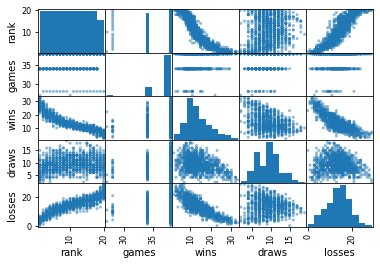

In [54]:
# explore the data
pd.plotting.scatter_matrix(df.iloc[:,1:8])

In [59]:
# Columns games_complete contain a lot of missing values and it is unclear what the meaning of this column is 
# Unused subs is the difference between max. number of possible subs in a season and actual subs done
# There is a lot of missing values and there is no information gain compared to game subs 
df.drop(columns=['games_complete','unused_subs'],inplace=True)
df

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,pens_att,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,5,56.0,3.0,139,102,15,218,418,99,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,...,8,59.0,1.0,148,115,15,241,418,107,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,...,9,71.0,5.0,153,120,18,182,418,102,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,...,7,65.0,6.0,150,106,13,243,418,107,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,...,5,50.0,2.0,183,137,8,202,418,96,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,La Liga,2020-2021,16,Alavés,38,9,11,18,36,57,...,8,96.0,8.0,143,87,9,99,418,163,1.00
1074,La Liga,2020-2021,17,Elche,38,8,12,18,34,55,...,3,99.0,3.0,156,107,7,87,418,152,0.95
1075,La Liga,2020-2021,18,Huesca,38,7,13,18,34,53,...,4,69.0,2.0,142,94,9,130,418,171,0.89
1076,La Liga,2020-2021,19,Valladolid,38,5,16,17,34,57,...,8,93.0,4.0,155,102,3,110,418,170,0.82


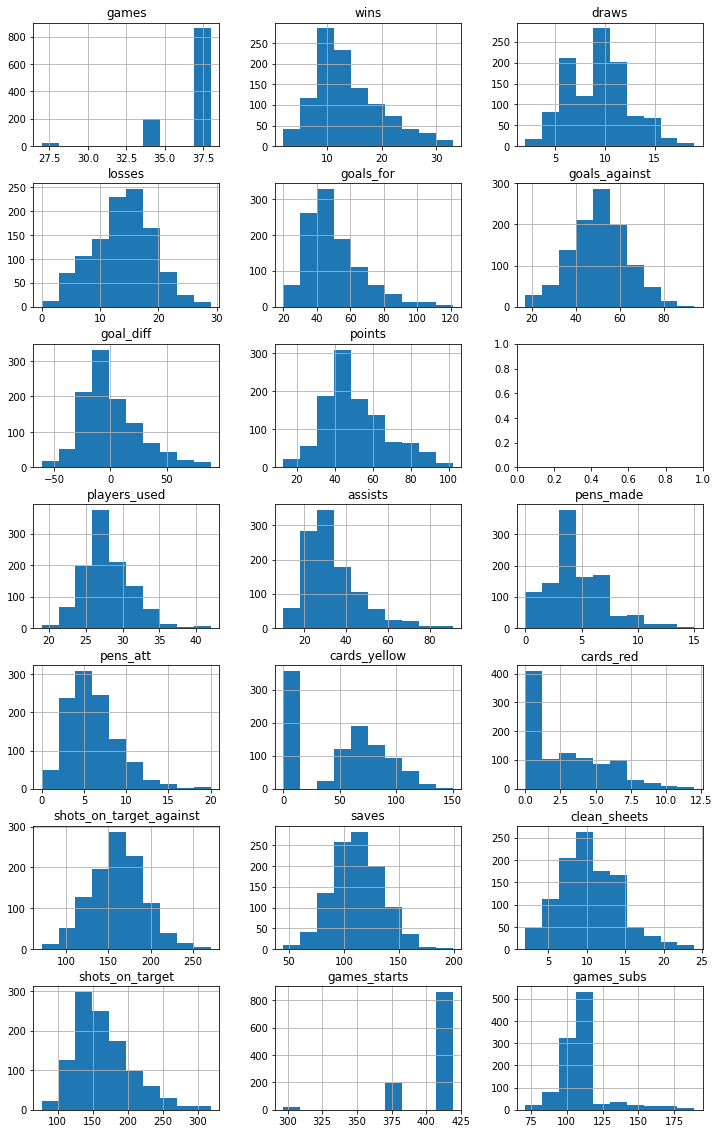

In [101]:
# plot histogramms of all columns
fig,axs = plt.subplots(len(df.columns[4:])//3,3,figsize=(12,20))
i = 4
for triaxis in axs: 
    for ax in triaxis:
        if df.columns[i] == 'notes':
            i+=1
            continue
        df.hist(column=df.columns[i],ax=ax)
        i+=1

8

In [52]:
# create dataframes for each league
df_leagues = {l: df[df['competition']==l] for l in df['competition'].unique()}

premier_league = df_leagues['Premier League'].reset_index(drop=True)
ligue1 = df_leagues['Ligue 1'].reset_index(drop=True)
bundesliga = df_leagues['Fußball-Bundesliga'].reset_index(drop=True)
serieA = df_leagues['Serie A'].reset_index(drop=True)
laLiga = df_leagues['La Liga'].reset_index(drop=True)
